# NLP Homework 1
### Alex Pine
#### September 20, 2016

## Experiment 1: Baseline

The first experiment was to run a baseline experiment without any major changes from the original code (other than ReLU), no dropout, and a 90/10 train/dev split. The model was trained for 8 epochs (2400 iterations) instead of the default 50, because the model starts to get perfect accuracy on the training set right around then.

I'll be judging other model variations against this version. I'll determine the best model by looking at which one has the best accuracy on the validation set.

### Parameters
BATCH_SIZE=32
DROPOUT_KEEP_PROB=1.0
EMBEDDING_DIM=64
EVALUATE_EVERY=1
FILTER_SIZES=3,4,5
L2_REG_LAMBDA=0.0
LEARNING_RATE=0.001
NUM_EPOCHS=8
NUM_FILTERS=64

Train/Dev split: 9596/1066

### Results

Final validation evaluation: loss: 0.75, accuracy: 0.69.

The two charts below show the loss and accuracy, respectively. The blue line was evaluated on the training dataset, the orange on the validation dataset. 



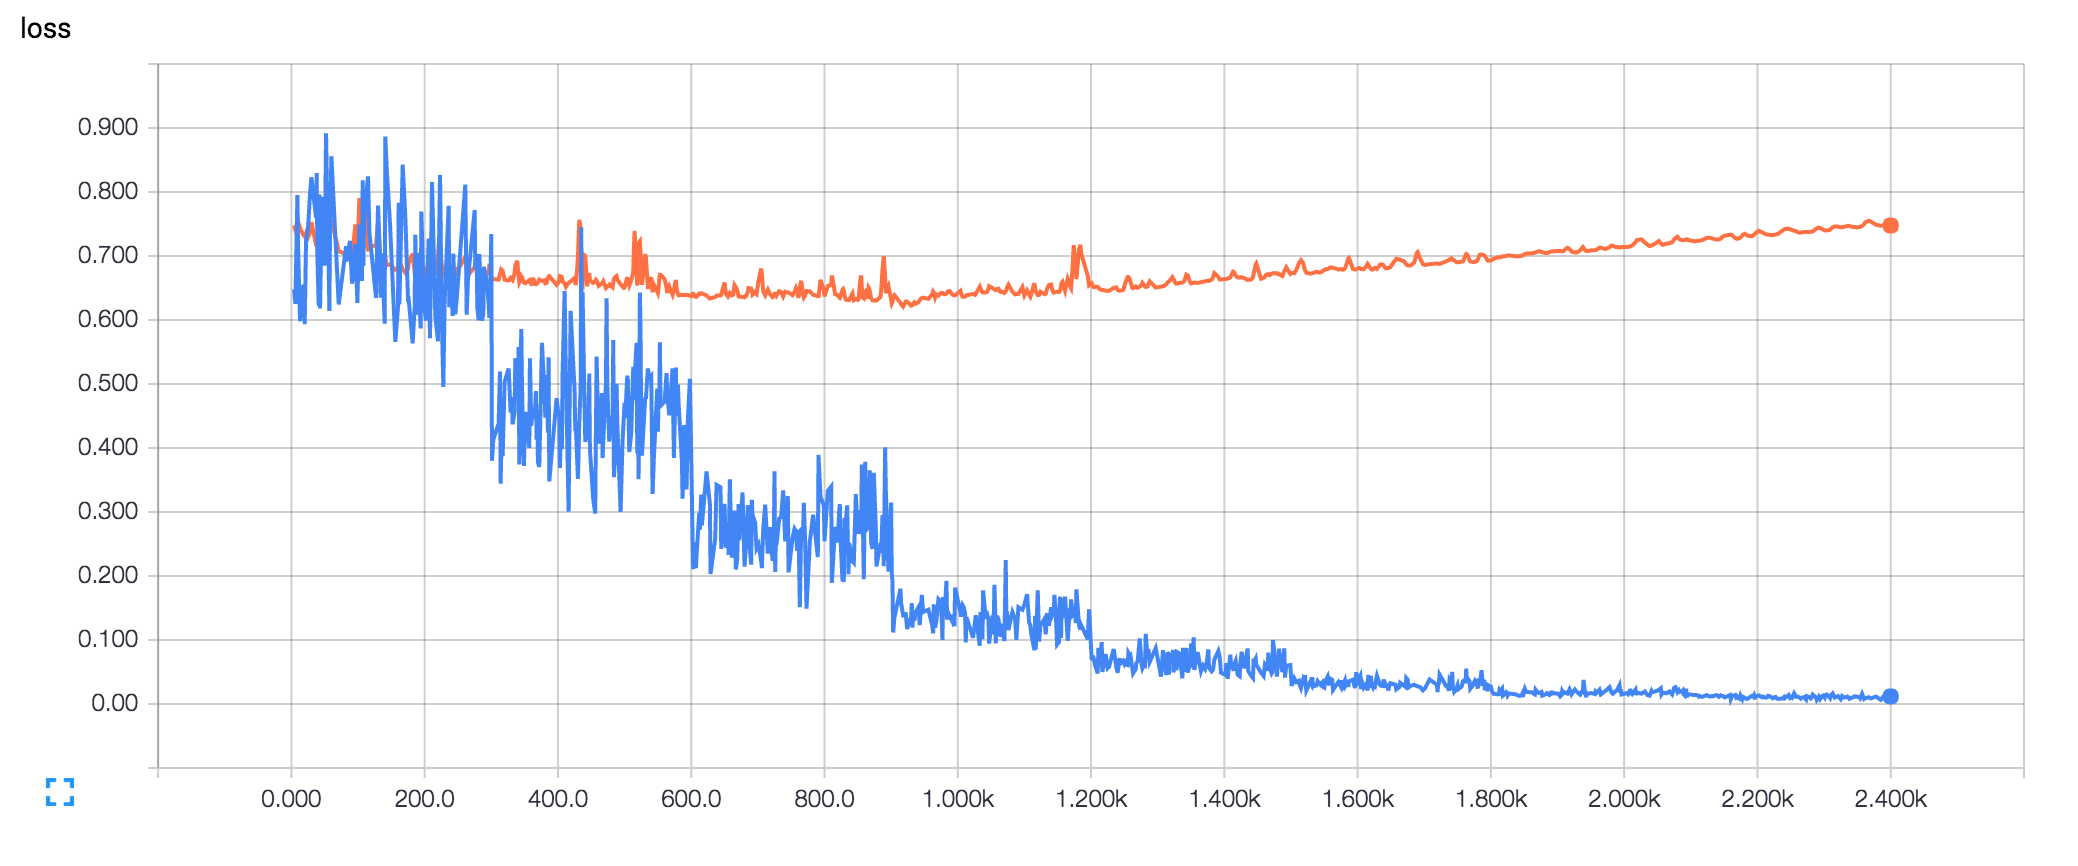

In [7]:
from IPython.display import Image
Image(filename='/Users/pinesol/nlp/hw1/base-loss.png') 

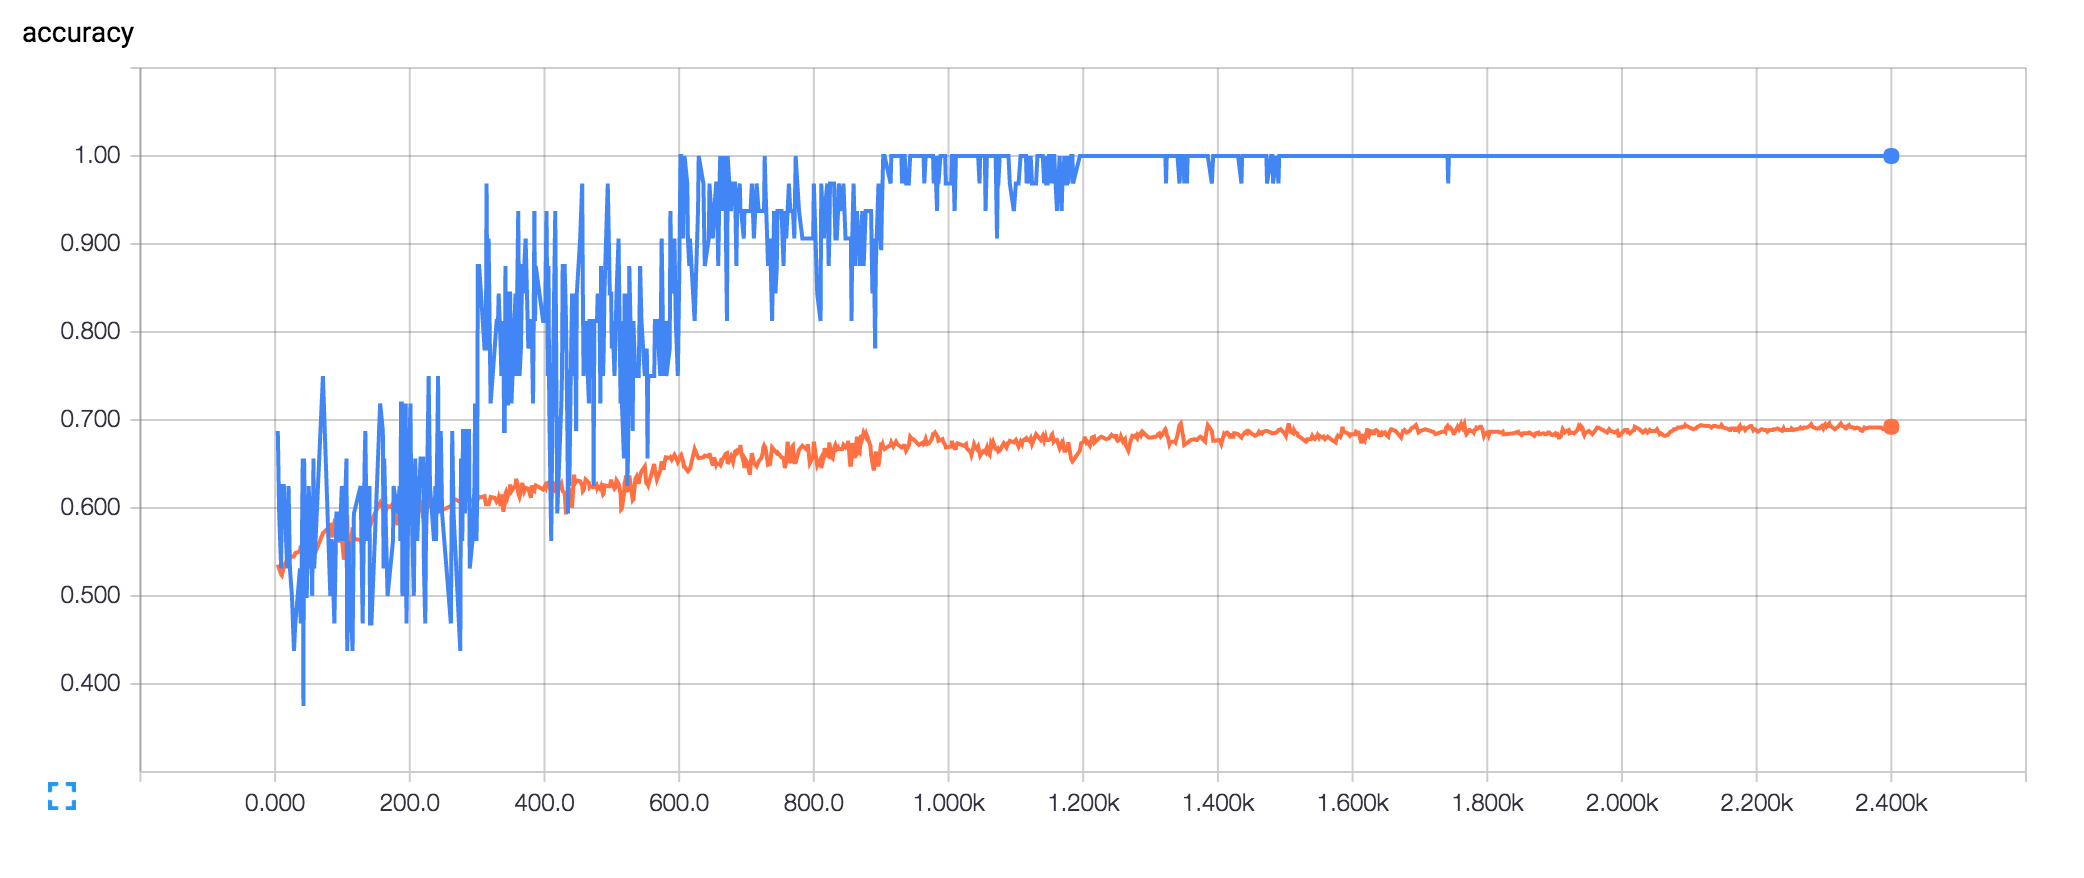

In [8]:
Image(filename='/Users/pinesol/nlp/hw1/base-accuracy.png') 

## Experiment 2: Dropout

The second experiment has exactly the same parameters as the first, except that dropout probability has been set to 0.5.

### Parameters
BATCH_SIZE=32,
DROPOUT_KEEP_PROB=0.5,
EMBEDDING_DIM=64,
FILTER_SIZES=3,4,5,
L2_REG_LAMBDA=0.0,
NUM_EPOCHS=50,
NUM_FILTERS=64

Train/Dev split: 9596/1066

### Results

Final validation evaluation: 

loss: 0.75, accuracy: 0.71.

The addition of dropout seems to not have made a significant difference. The final accuracy is slighly higher, but that could easily be due to noise.

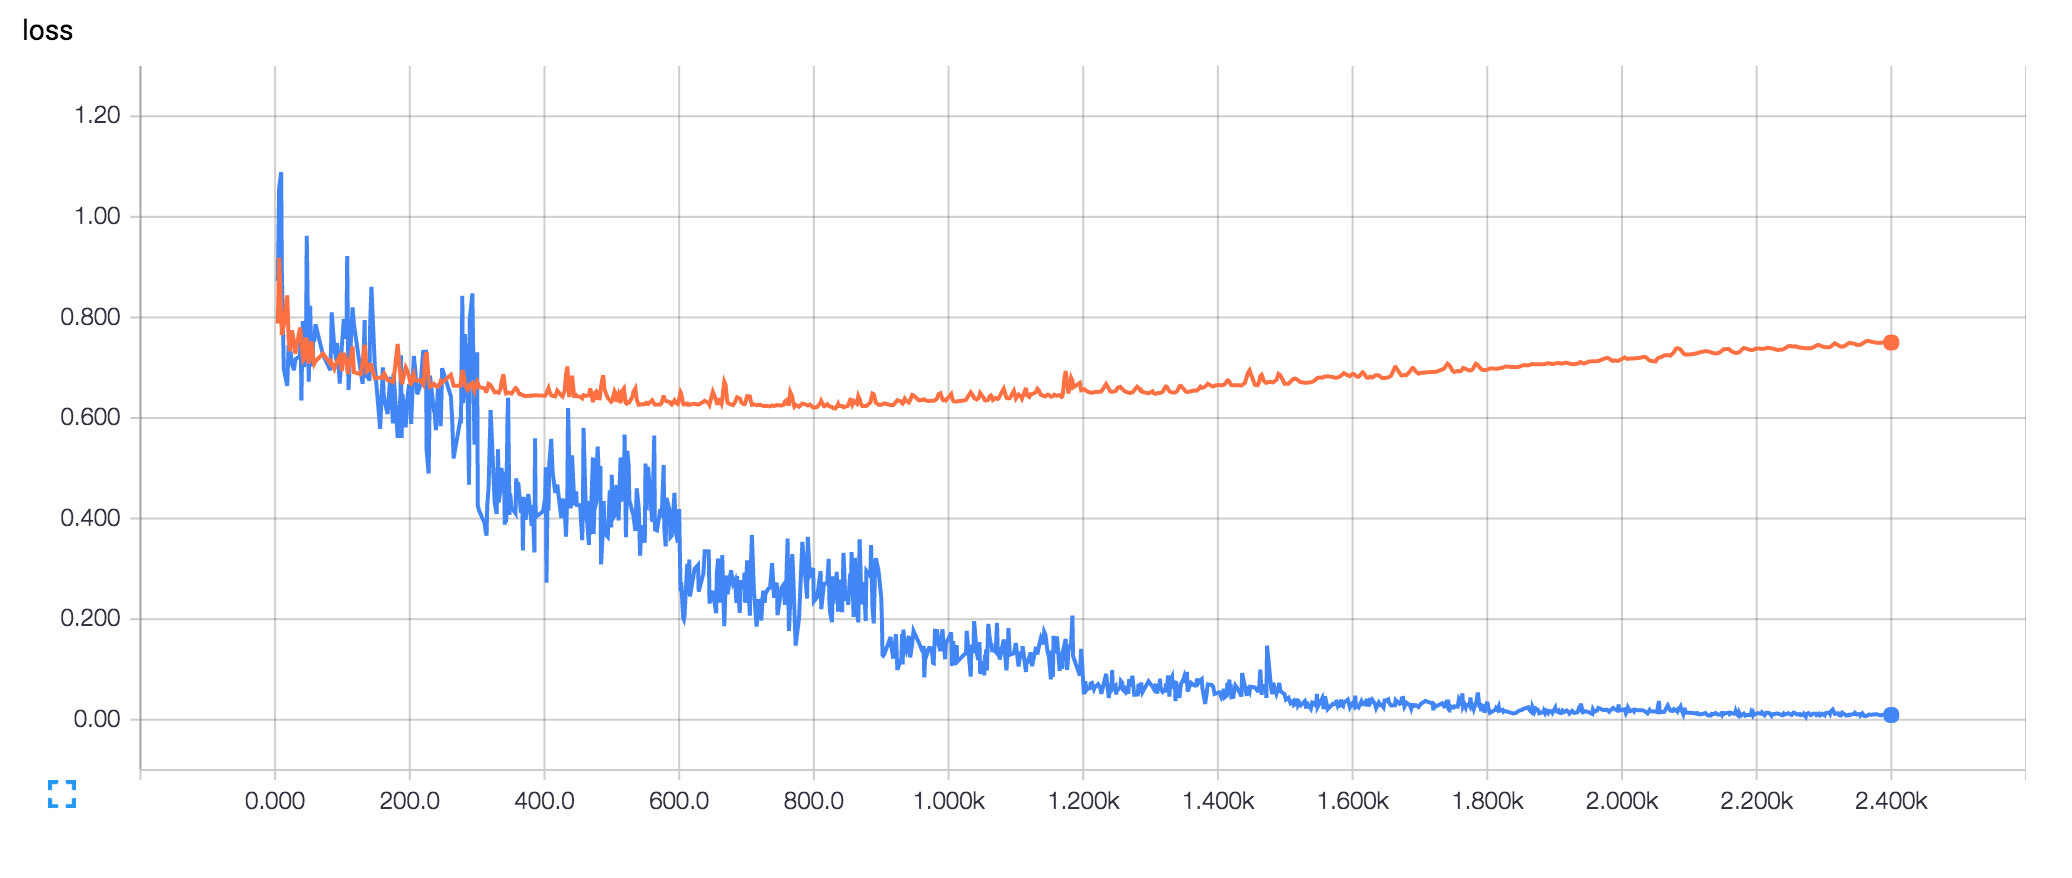

In [5]:
Image(filename='/Users/pinesol/nlp/hw1/dropout-loss.png') 

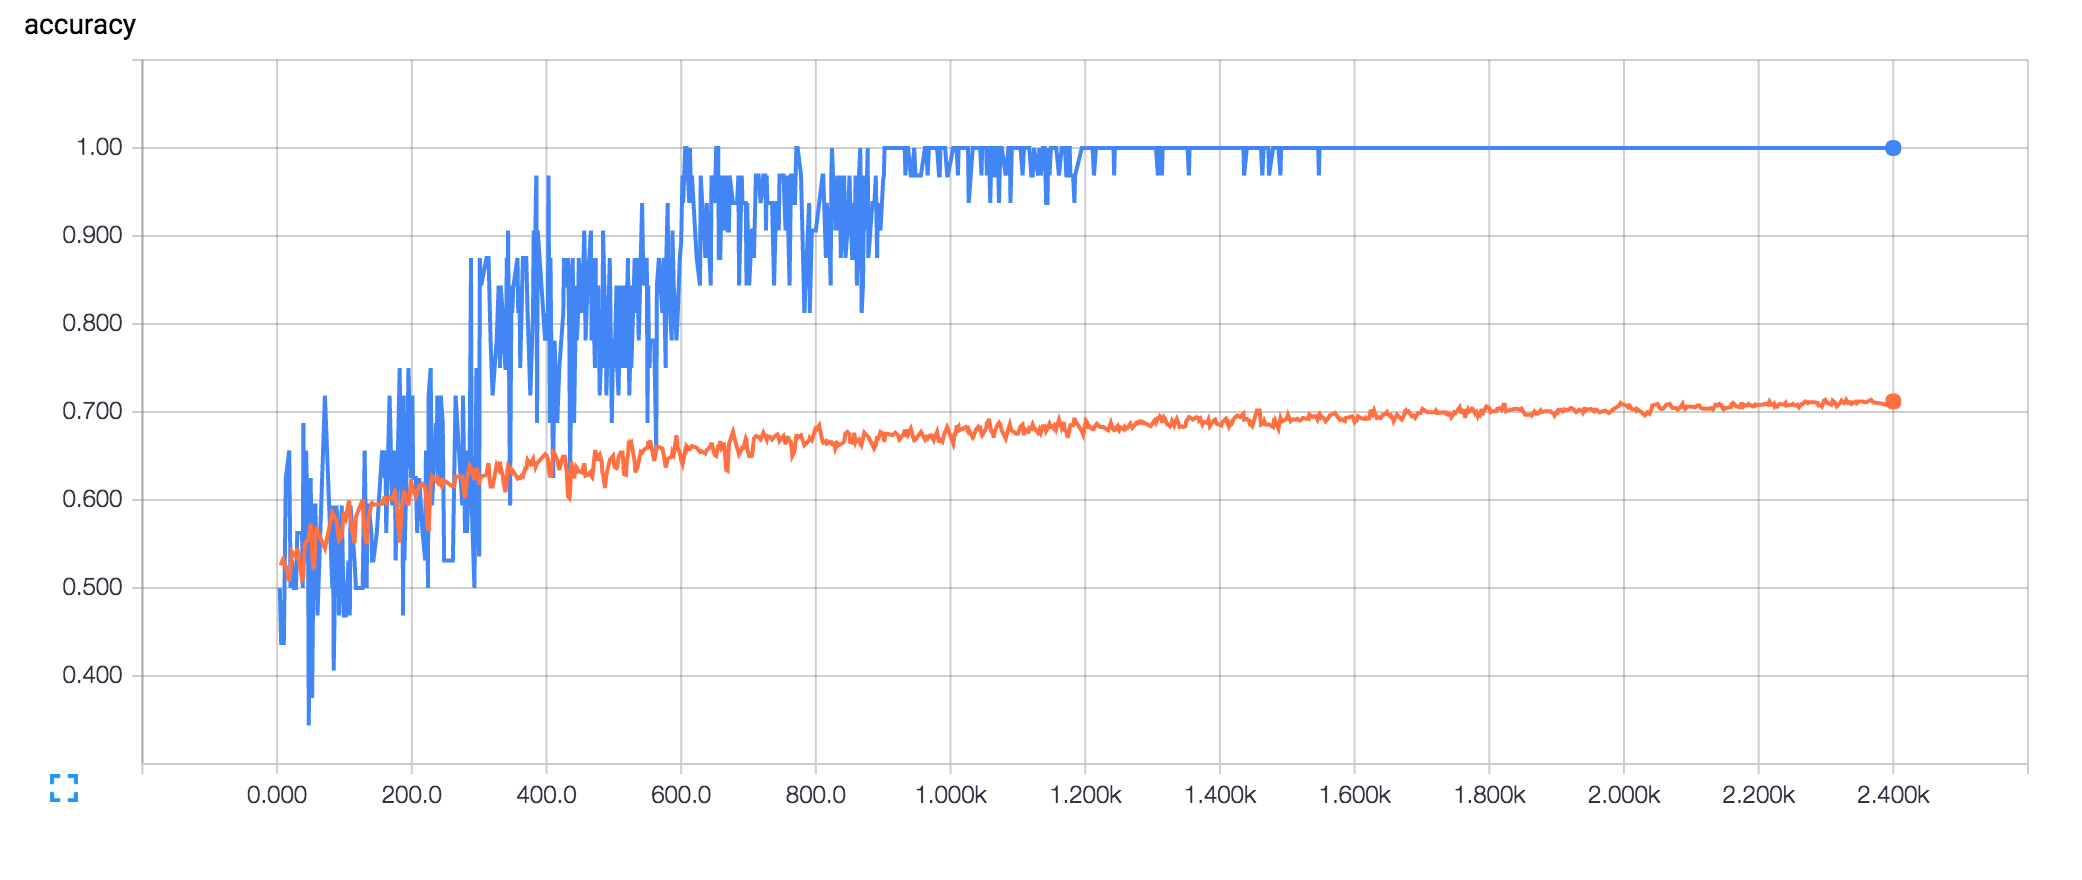

In [6]:
Image(filename='/Users/pinesol/nlp/hw1/dropout-accuracy.png') 

## Experiment 3: An additional convolution layer

In the third experiment, I added a second convolution layer after the first one. More precisely, I added a second convolution+ReLU layer after the first convolution+ReLU layer, and before the pooling layer. I kept the filter sizes equal to those of the first layer. Unlike the first convolution layer, the second layer kept the number of output filters constant, leaving it at 64.

Since the second convolution layer is input several convolved has access to a larger number of words per sentence compared to the first layer, it may be able to learn more complex features from the language.

### Parameters
This experiment uses the same hyperparameters as the previous experiment, including the dropout probability of 0.5. The only thing different is the additional convolution+ReLU layer.

### Results

Loss 0.80, Accuracy 0.68.

The extra convolutional layer has surprisingly decreased the validation accuracy to 68%, down from the dropout model's high of 71%. It's not clear why this would happen, but my suspicion is that there is simply not enough training data to train the extra parameters introduced with a second layer of convolution. Another possibility is that the features learned in the first covolution layer are not particularly composable--that is, combining the features from the first convolution layer with those around it do not yield features that are more informative.

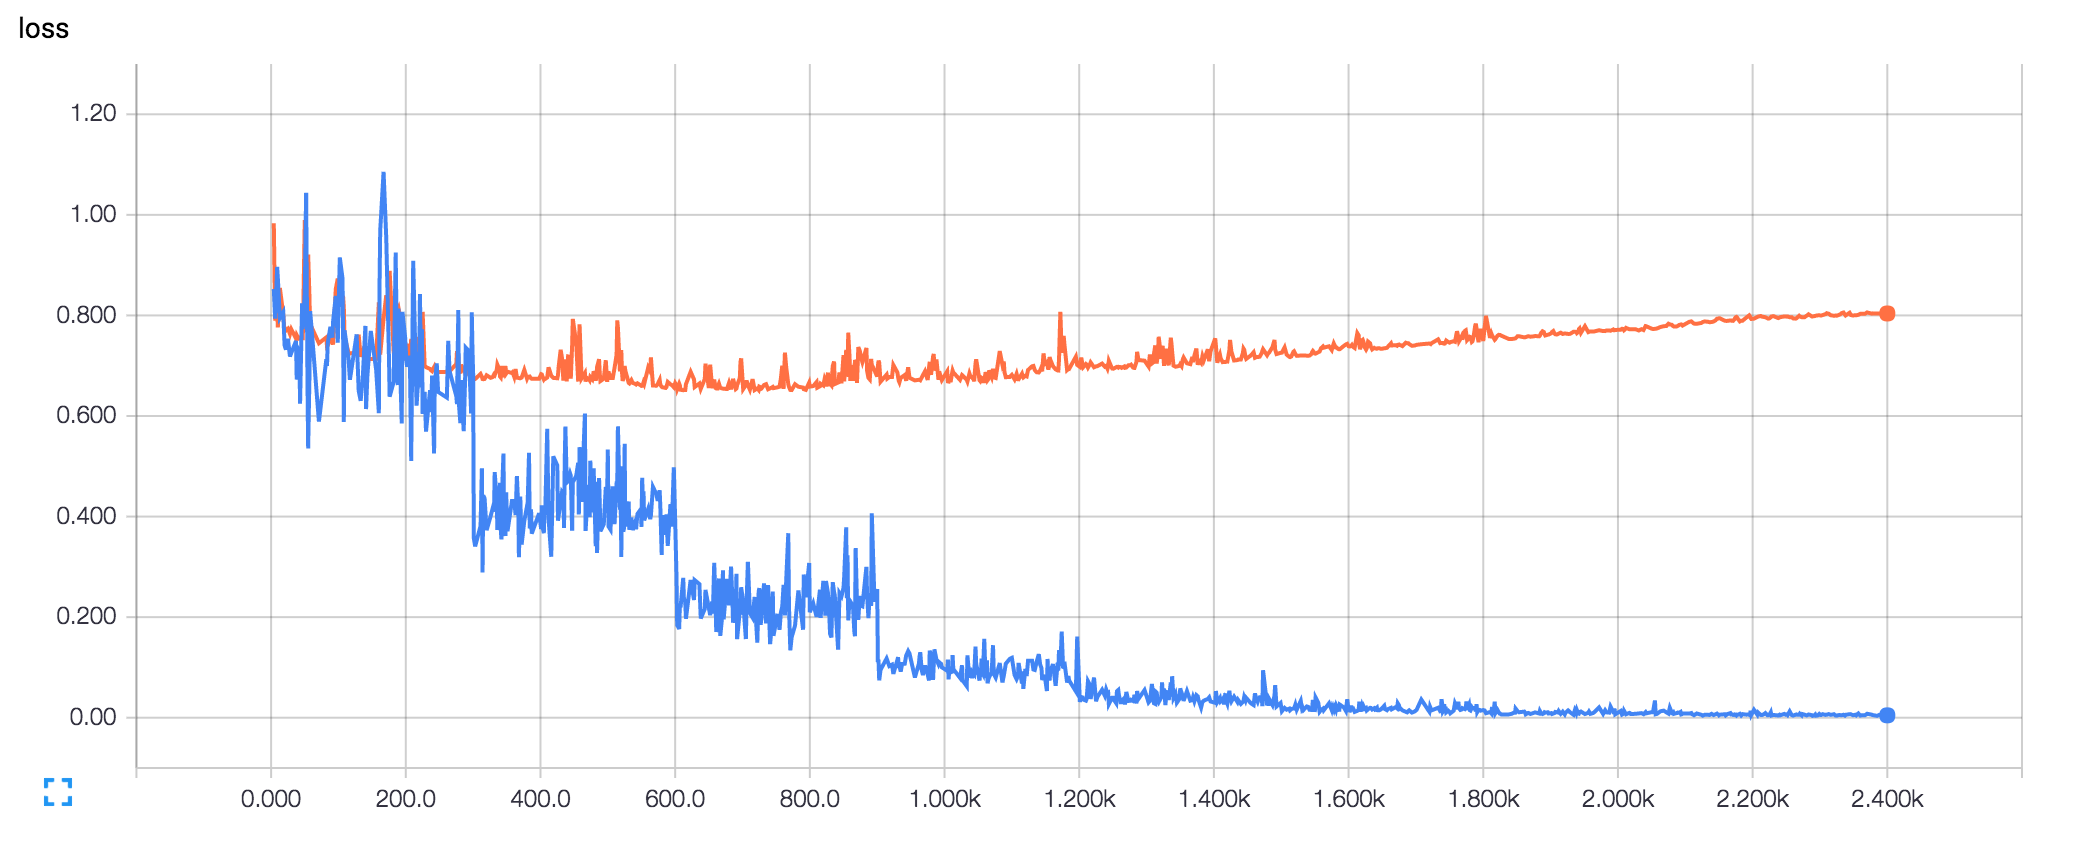

In [9]:
Image(filename='/Users/pinesol/nlp/hw1/two-layer-loss.png') 

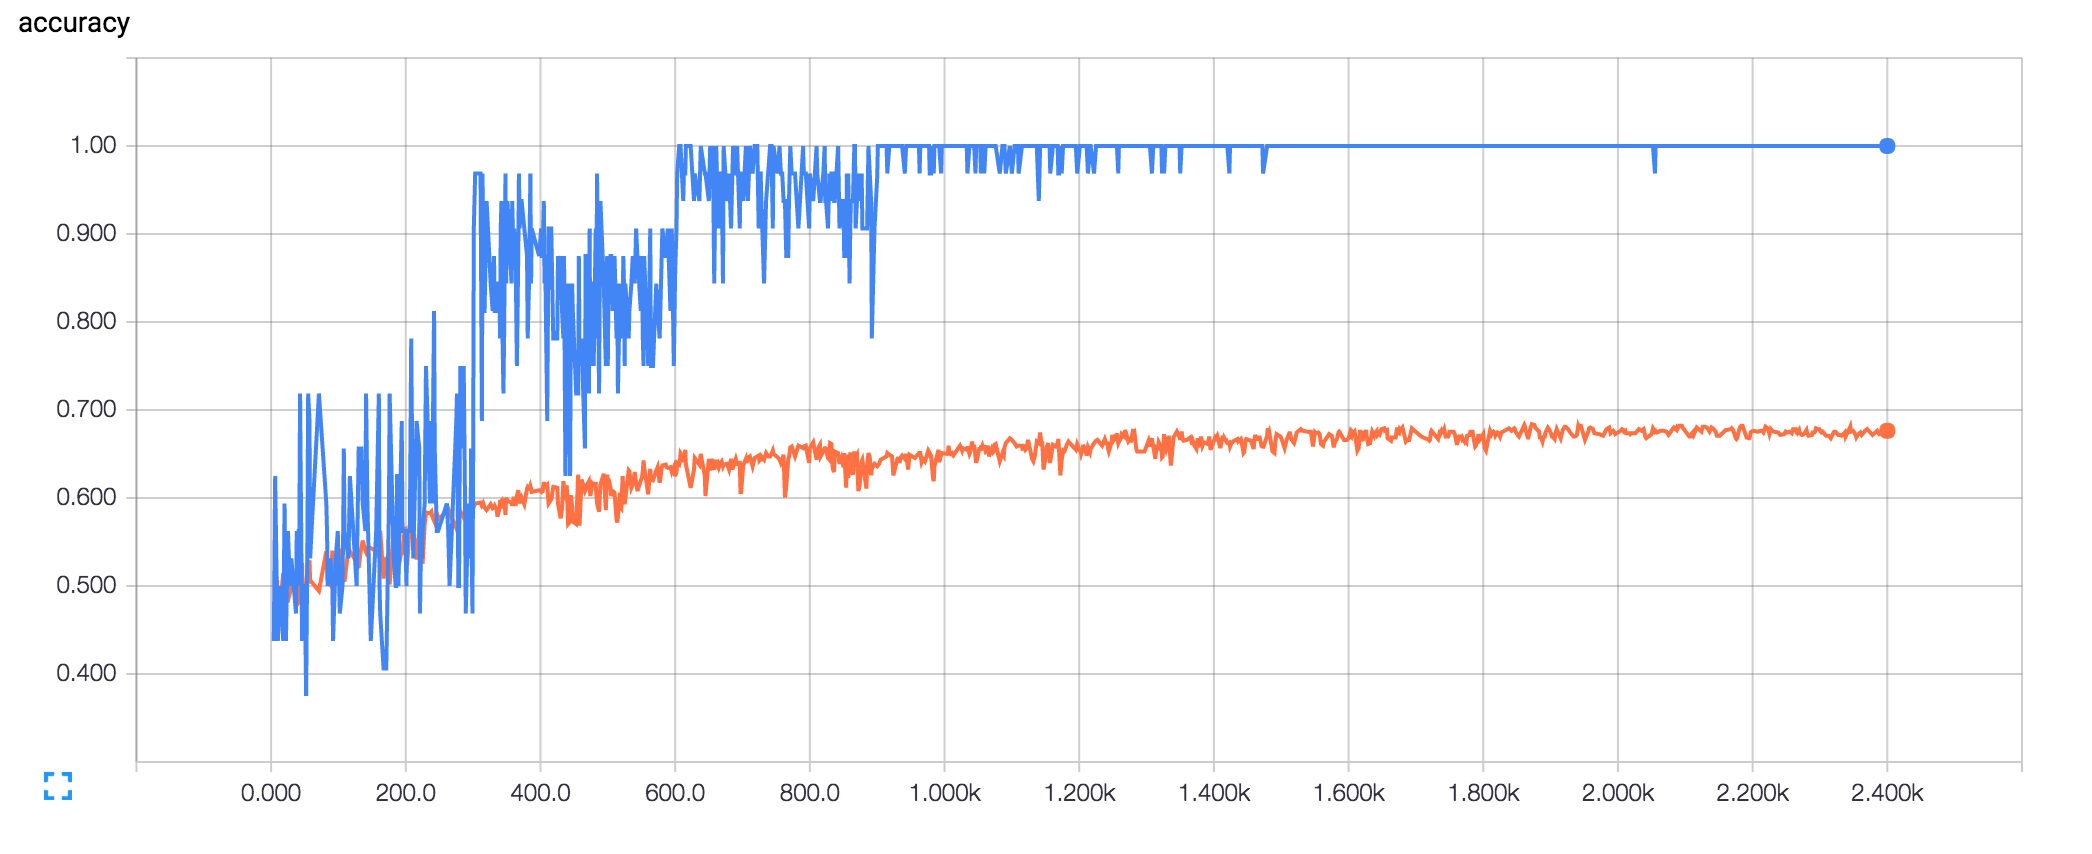

In [10]:
Image(filename='/Users/pinesol/nlp/hw1/two-layer-accuracy.png') 

## Experiment 4: Increasing the starting learning rate

The code uses the AdamOptimizer, which decreases the learning rate over time from its initial value of 0.001. In this experiment, I use the baseline model plus dropout, while changing the starting learning rate to 0.01.

### Results
The learning curves are much more noisy, suggesting that the increased learning rate is preventing the model from settling in a single area of the loss landscape. It actually achieves the highest accuracy of any model tested so far (about 74% in the middle of the training), but the erratic shape of the learning curve suggests this is simply due to chance.

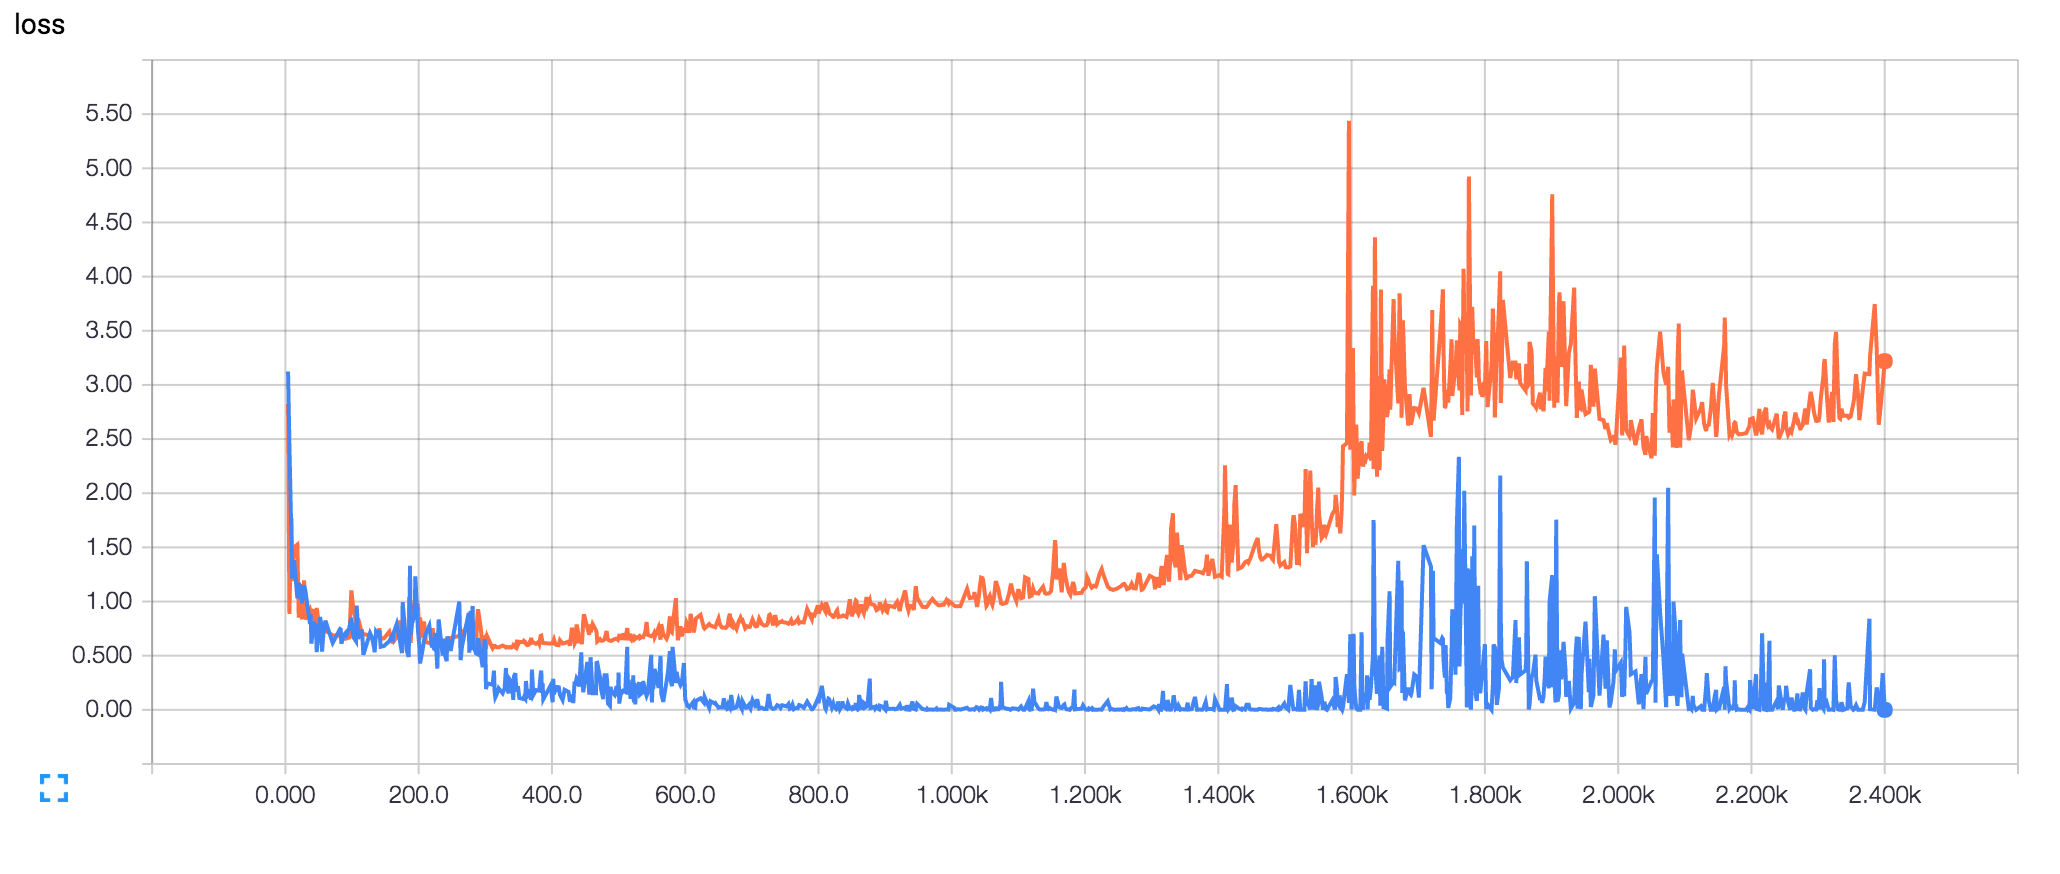

In [12]:
Image(filename='/Users/pinesol/nlp/hw1/learning-rate-loss.png') 

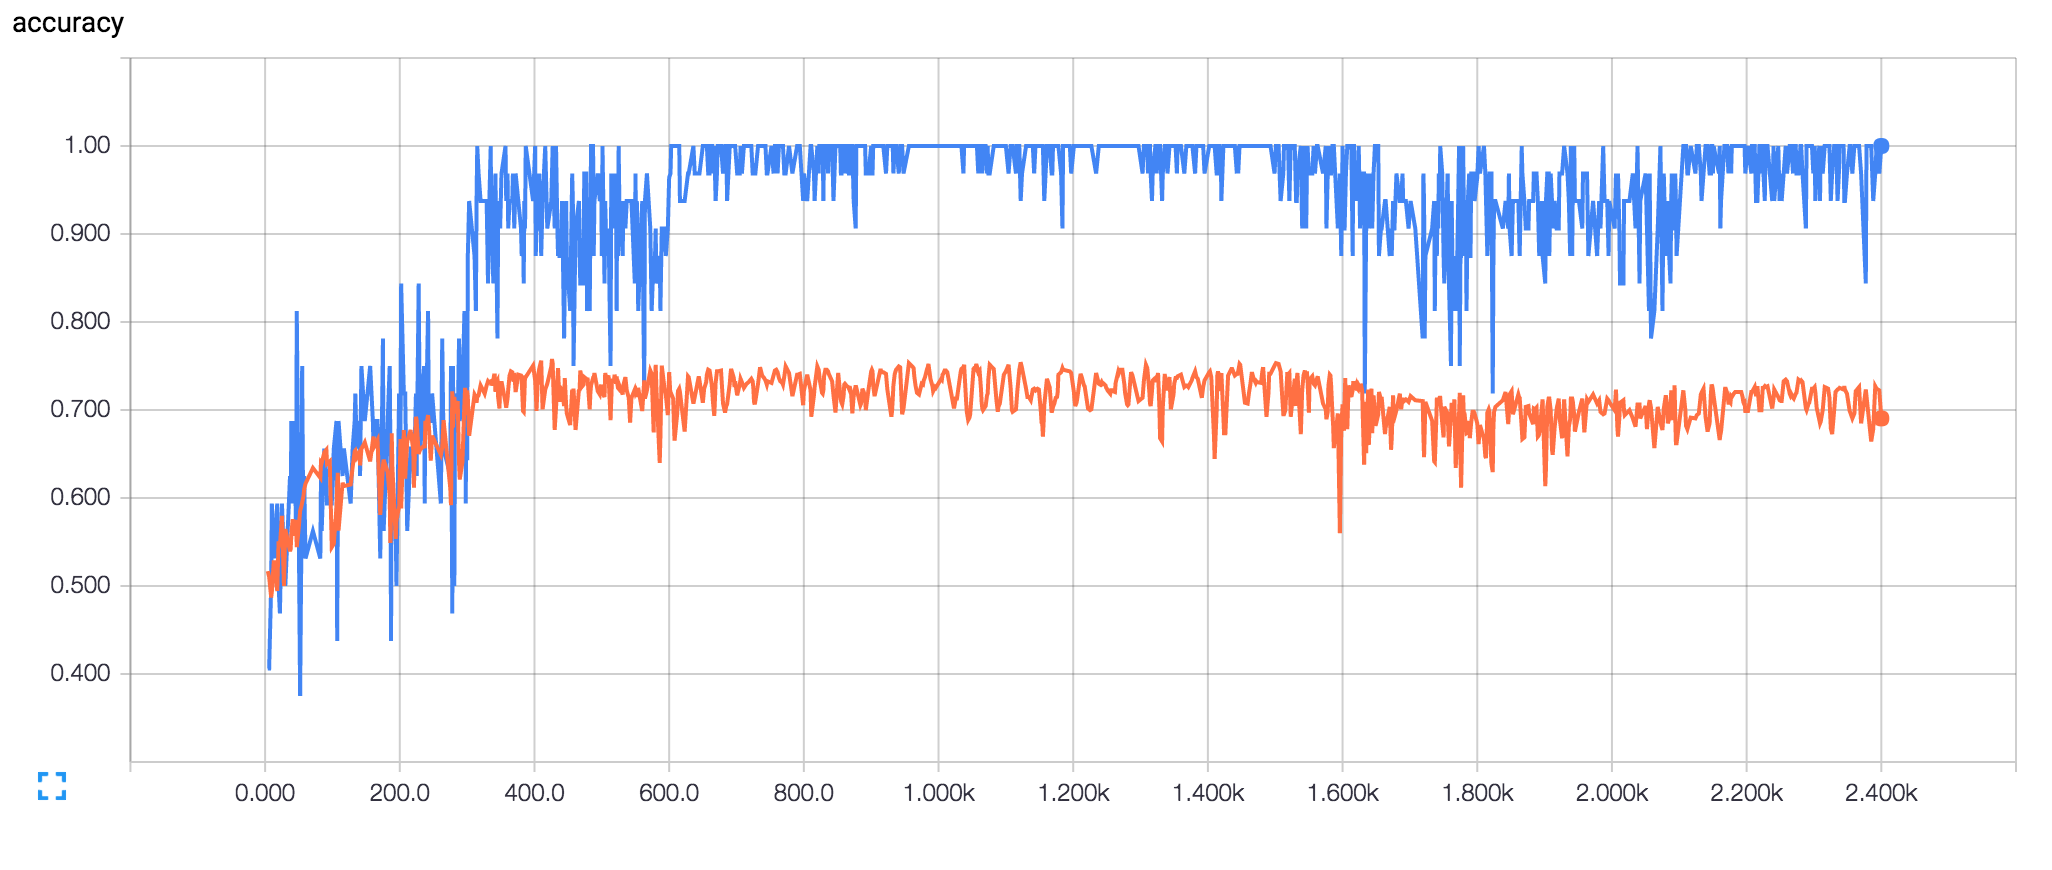

In [11]:
Image(filename='/Users/pinesol/nlp/hw1/learning-rate-accuracy.png') 